In [61]:
"""
Necessary Comment : jupyter notebook
"""

'\nNecessary Comment : jupyter notebook\n'

In [62]:
"""
Necessary Lighbary
"""
import sqlite3
import pandas as pd
import talib
import mplfinance as mpf
import numpy as np

In [63]:
"""
Database Connection
"""
connection = sqlite3.connect(r"cripto.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

In [64]:
"""
Dataframe
"""
df = pd.DataFrame(database_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,BTCBUSD,18299.21,18310.87,18288.88,18298.00,84.13714,-0.00661230730725057,1667967899999,1902.0,48.09659,1.667968e+09
1,2,BTCBUSD,18298.82,18315.80,18276.33,18285.50,123.81789,-0.0727915789105511,1667967959999,3040.0,58.30215,1.667968e+09
2,3,BTCBUSD,18284.75,18329.71,18280.41,18328.54,136.40662,0.239489191812854,1667968019999,2724.0,83.03480,1.667968e+09
3,4,BTCBUSD,18328.34,18354.16,18317.67,18342.75,137.60742,0.0786214136141072,1667968079999,2651.0,79.54594,1.667968e+09
4,5,BTCBUSD,18343.61,18361.67,18329.69,18330.08,120.04164,-0.0737586549212442,1667968139999,2608.0,57.40277,1.667968e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
43195,43196,BTCBUSD,17200.36,17200.87,17197.56,17198.15,41.34328,-0.012848568285775,1670559599999,820.0,20.83257,1.670560e+09
43196,43197,BTCBUSD,17198.56,17202.60,17198.33,17202.15,54.59848,0.0208738406006093,1670559659999,1084.0,32.42155,1.670560e+09
43197,43198,BTCBUSD,17202.15,17205.56,17199.64,17204.60,100.95454,0.0142424057457765,1670559719999,1581.0,52.66568,1.670560e+09
43198,43199,BTCBUSD,17204.60,17207.96,17204.11,17206.04,90.23437,0.00836985457379032,1670559779999,1844.0,41.26322,1.670560e+09


In [65]:
"""
Name Columns
"""
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'Trades', 'BuyQuoteVolume', 'Time']
# df = df.iloc[:, 2:12]
df


,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,Trades,BuyQuoteVolume,Time
0,1,BTCBUSD,18299.21,18310.87,18288.88,18298.00,84.13714,-0.00661230730725057,1667967899999,1902.0,48.09659,1.667968e+09
1,2,BTCBUSD,18298.82,18315.80,18276.33,18285.50,123.81789,-0.0727915789105511,1667967959999,3040.0,58.30215,1.667968e+09
2,3,BTCBUSD,18284.75,18329.71,18280.41,18328.54,136.40662,0.239489191812854,1667968019999,2724.0,83.03480,1.667968e+09
3,4,BTCBUSD,18328.34,18354.16,18317.67,18342.75,137.60742,0.0786214136141072,1667968079999,2651.0,79.54594,1.667968e+09
4,5,BTCBUSD,18343.61,18361.67,18329.69,18330.08,120.04164,-0.0737586549212442,1667968139999,2608.0,57.40277,1.667968e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
43195,43196,BTCBUSD,17200.36,17200.87,17197.56,17198.15,41.34328,-0.012848568285775,1670559599999,820.0,20.83257,1.670560e+09
43196,43197,BTCBUSD,17198.56,17202.60,17198.33,17202.15,54.59848,0.0208738406006093,1670559659999,1084.0,32.42155,1.670560e+09
43197,43198,BTCBUSD,17202.15,17205.56,17199.64,17204.60,100.95454,0.0142424057457765,1670559719999,1581.0,52.66568,1.670560e+09
43198,43199,BTCBUSD,17204.60,17207.96,17204.11,17206.04,90.23437,0.00836985457379032,1670559779999,1844.0,41.26322,1.670560e+09


In [66]:
# """
# Candle Data Column
# """
# df_candle = df[['CloseTime', 'Open', 'High', 'Low', 'Close', 'VolumeBTC']]
# df_candle

In [67]:
# """
# Time Indexing
# """
# df_candle = df.set_index('CloseTime')
# df_candle.index = pd.to_datetime(df.index, unit='ms')

In [68]:
# mpf.plot(
#     df_candle.tail(5),
# #     df,
#     mav=[7, 25 , 90],
#     type="candle",
# #     type="renko",
#     title=f"BTC BUSD Price Candle",
#     style="yahoo",
# )

In [69]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
# df = df.tail(100)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,
2022-11-09 04:24:59.999,1,BTCBUSD,18299.21,18310.87,18288.88,18298.00,84.13714,-0.00661230730725057,1902.0,48.09659,1.667968e+09
2022-11-09 04:25:59.999,2,BTCBUSD,18298.82,18315.80,18276.33,18285.50,123.81789,-0.0727915789105511,3040.0,58.30215,1.667968e+09
2022-11-09 04:26:59.999,3,BTCBUSD,18284.75,18329.71,18280.41,18328.54,136.40662,0.239489191812854,2724.0,83.03480,1.667968e+09
2022-11-09 04:27:59.999,4,BTCBUSD,18328.34,18354.16,18317.67,18342.75,137.60742,0.0786214136141072,2651.0,79.54594,1.667968e+09
2022-11-09 04:28:59.999,5,BTCBUSD,18343.61,18361.67,18329.69,18330.08,120.04164,-0.0737586549212442,2608.0,57.40277,1.667968e+09
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09 04:19:59.999,43196,BTCBUSD,17200.36,17200.87,17197.56,17198.15,41.34328,-0.012848568285775,820.0,20.83257,1.670560e+09
2022-12-09 04:20:59.999,43197,BTCBUSD,17198.56,17202.60,17198.33,17202.15,54.59848,0.0208738406006093,1084.0,32.42155,1.670560e+09
2022-12-09 04:21:59.999,43198,BTCBUSD,17202.15,17205.56,17199.64,17204.60,100.95454,0.0142424057457765,1581.0,52.66568,1.670560e+09


In [70]:
# # TODO: ALL all 100 and -100 to the X asis
# # Find Candle Pattern
# ENGULFING = talib.CDLENGULFING(df['Open'], df['High'], df['Low'],
#                                          df['Close'])
# # ENGULFING
# ENGULFING[ENGULFING != 0]

In [71]:
# bullish_engulfing = (ENGULFING.replace([-100, 0], np.nan)/100) *(df.Low-2)
# bearsh_engulfing = (-ENGULFING.replace([100, 0], np.nan)/100) *(df.High *1.0001)

In [72]:
# addplot = [mpf.make_addplot(bullish_engulfing, type='scatter', color='g', marker = "^"), mpf.make_addplot(bearsh_engulfing, type='scatter', color='r', marker = "v")]
# mpf.plot(df, addplot = addplot,title=f"Engulfing Signal", type="candle",style="yahoo")

In [73]:
# dir(talib)

In [74]:
"""
means you are dropping duplicket column.
https://stackoverflow.com/questions/35084071/concat-dataframe-reindexing-only-valid-with-uniquely-valued-index-objects

"""
df = df.head(100)
df = df.reset_index(drop=True) 
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,Trades,BuyQuoteVolume,Time
0,1,BTCBUSD,18299.21,18310.87,18288.88,18298.00,84.13714,-0.00661230730725057,1902.0,48.09659,1.667968e+09
1,2,BTCBUSD,18298.82,18315.80,18276.33,18285.50,123.81789,-0.0727915789105511,3040.0,58.30215,1.667968e+09
2,3,BTCBUSD,18284.75,18329.71,18280.41,18328.54,136.40662,0.239489191812854,2724.0,83.03480,1.667968e+09
3,4,BTCBUSD,18328.34,18354.16,18317.67,18342.75,137.60742,0.0786214136141072,2651.0,79.54594,1.667968e+09
4,5,BTCBUSD,18343.61,18361.67,18329.69,18330.08,120.04164,-0.0737586549212442,2608.0,57.40277,1.667968e+09
5,6,BTCBUSD,18331.95,18338.42,18319.82,18322.46,70.95617,-0.0517675424600307,1803.0,40.13812,1.667968e+09
6,7,BTCBUSD,18323.91,18342.59,18318.00,18331.54,126.24964,0.0416395845646536,2373.0,53.89706,1.667968e+09
7,8,BTCBUSD,18331.56,18360.38,18326.94,18344.98,75.93955,0.0732070811212917,2285.0,36.22203,1.667968e+09
8,9,BTCBUSD,18344.00,18361.92,18334.66,18343.86,120.49835,-0.000763192324462592,2387.0,58.18245,1.667968e+09
9,10,BTCBUSD,18343.50,18375.92,18336.73,18350.51,182.44971,0.0382151715866569,3503.0,96.71717,1.667968e+09


In [75]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
print(cols)

['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR', 'CDLDRAGONFLYDOJI', 'CDLENGULFING', 'CDLEVENINGDOJISTAR', 'CDLEVENINGSTAR', 'CDLGAPSIDESIDEWHITE', 'CDLGRAVESTONEDOJI', 'CDLHAMMER', 'CDLHANGINGMAN', 'CDLHARAMI', 'CDLHARAMICROSS', 'CDLHIGHWAVE', 'CDLHIKKAKE', 'CDLHIKKAKEMOD', 'CDLHOMINGPIGEON', 'CDLIDENTICAL3CROWS', 'CDLINNECK', 'CDLINVERTEDHAMMER', 'CDLKICKING', 'CDLKICKINGBYLENGTH', 'CDLLADDERBOTTOM', 'CDLLONGLEGGEDDOJI', 'CDLLONGLINE', 'CDLMARUBOZU', 'CDLMATCHINGLOW', 'CDLMATHOLD', 'CDLMORNINGDOJISTAR', 'CDLMORNINGSTAR', 'CDLONNECK', 'CDLPIERCING', 'CDLRICKSHAWMAN', 'CDLRISEFALL3METHODS', 'CDLSEPARATINGLINES', 'CDLSHOOTINGSTAR', 'CDLSHORTLINE', 'CDLSPINNINGTOP', 'CDLSTALLEDPATTERN', 'CDLSTICKSANDWICH', 'CDLTAKURI', 'CDLTASUKIGAP', 'CDL

In [76]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
# print(patterns)

## Add Newely Created Dataframe to Existing Dataframe 
https://stackoverflow.com/questions/11106823/adding-two-pandas-dataframes

In [77]:
# df = df.add(patterns)
# df

0       0
1       0
2     100
3     100
4       0
5       0
6       0
7       0
8       0
9     100
10    200
11    200
12    200
13   -300
14   -300
15      0
16   -400
17    100
18   -200
19   -100
20    200
21      0
22    100
23   -100
24   -100
25   -200
26    200
27   -200
28   -100
29   -100
30    300
31      0
32      0
33   -100
34    200
35    200
36      0
37    600
38    500
39    500
40   -100
41   -100
42      0
43   -100
44   -100
45      0
46    100
47      0
48   -200
49    100
50    200
51    200
52    200
53   -100
54    100
55   -300
56    100
57    100
58      0
59   -100
60      0
61    400
62    200
63   -100
64    100
65    100
66      0
67   -100
68      0
69    100
70   -100
71    500
72    200
73    300
74   -100
75    100
76      0
77    400
78    200
79    300
80      0
81    200
82   -100
83    100
84      0
85      0
86      0
87      0
88    200
89   -200
90   -100
91      0
92    500
93   -100
94    100
95      0
96   -100
97   -200
98    100
99    100


<AxesSubplot: >

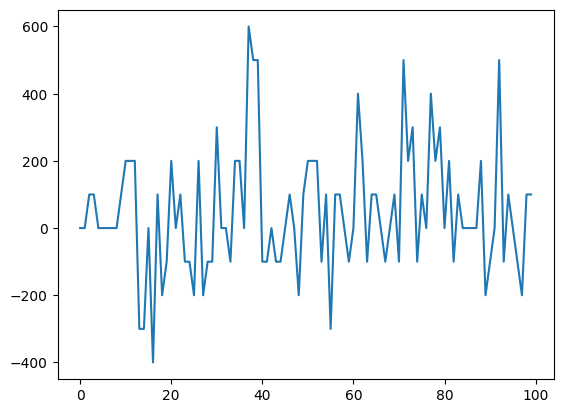

In [78]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()

In [79]:
df1=pd.DataFrame(all_pats)
df3=df.iloc[:,7]
print(df3)

#print(df1)
#print(df3)
#frames = [df1, df3]



df4=df.iloc[:,2:10]

print(df4)




print(df1)
array = df1.values
array2 = [];

for x in range(0,len(array)):
    for y in array[x]: 
        if  y>=200:
            array2.append(1)
       
        elif y<=-200 :
            array2.append(1)
        else:
            array2.append(0)
df2=pd.DataFrame(array2).astype("int")
print(df2)



0      -0.00661230730725057
1       -0.0727915789105511
2         0.239489191812854
3        0.0786214136141072
4       -0.0737586549212442
5       -0.0517675424600307
6        0.0416395845646536
7        0.0732070811212917
8     -0.000763192324462592
9        0.0382151715866569
10      -0.0107899084928545
11      -0.0487233023280838
12       0.0230103415672416
13       -0.104988021226561
14       -0.117919123087705
15      -0.0691134465810504
16       -0.158824838345834
17       0.0595807225695995
18      -0.0967610762152206
19      -0.0711038071761137
20      -0.0131556660631585
21      -0.0986737697162526
22       0.0663962528369428
23       0.0316955298884047
24      -0.0798645427193066
25      -0.0301157233698101
26        0.116559262757164
27      -0.0304762405912901
28      -0.0757188631533771
29      -0.0550855059828723
30       0.0832836943483031
31      -0.0853478197910277
32      -0.0487484066188095
33      -0.0517981596547831
34        0.126401684769586
35        0.14962262

In [80]:
"""
X value for DecisionTreeClassifier

X = df.drop(columns=['Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime', 'BuyQuoteVolume', 'Time'])
X

X= df.drop(columns=['Id','Symbol','Time'])
print(X)
"""


X=df4
print(X)
y=df2


        Open      High       Low     Close  VolumeBTC                 Change  Trades  BuyQuoteVolume
0   18299.21  18310.87  18288.88  18298.00   84.13714   -0.00661230730725057  1902.0        48.09659
1   18298.82  18315.80  18276.33  18285.50  123.81789    -0.0727915789105511  3040.0        58.30215
2   18284.75  18329.71  18280.41  18328.54  136.40662      0.239489191812854  2724.0        83.03480
3   18328.34  18354.16  18317.67  18342.75  137.60742     0.0786214136141072  2651.0        79.54594
4   18343.61  18361.67  18329.69  18330.08  120.04164    -0.0737586549212442  2608.0        57.40277
5   18331.95  18338.42  18319.82  18322.46   70.95617    -0.0517675424600307  1803.0        40.13812
6   18323.91  18342.59  18318.00  18331.54  126.24964     0.0416395845646536  2373.0        53.89706
7   18331.56  18360.38  18326.94  18344.98   75.93955     0.0732070811212917  2285.0        36.22203
8   18344.00  18361.92  18334.66  18343.86  120.49835  -0.000763192324462592  2387.0       

In [81]:
"""
y value for DecisionTreeClassifier

"""




'\ny value for DecisionTreeClassifier\n\n'

In [82]:
"""
Model for AI Research
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
#model=RandomForestClassifier()
model

DecisionTreeClassifier()

In [83]:
model.fit(X, y)

DecisionTreeClassifier()

In [84]:
## Directally Grab Fidable data from internet but it have to be superviged test data from database
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 100)
df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
df = df.iloc[0]
print(df)

Open              17222.380000
High              17223.650000
Low               17221.230000
Close             17222.480000
VolumeBTC            30.661170
Trades              938.000000
BuyQuoteVolume       14.205770
Change                0.000581
Name: 2022-12-09 03:09:00, dtype: float64


In [85]:
print(model.predict([df]))

[1]


C:\Users\user\PycharmProjects\TradingAi\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [86]:
# model.predict([  [40, 0],[60, 1] ])
print(model.predict([ [300,4621,4464,4571,444,4687212,4455,4445] ]))

[0]


C:\Users\user\PycharmProjects\TradingAi\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
